geochecking Debby's station, with fixed lats, lons

In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
whos

Interactive namespace is empty.


In [33]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import cmocean as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import glob
from matplotlib import reload
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Retrieve 

In [34]:
segment = 1
deep = 22
dirstr = './'

resdir = 'may10_a1/'
resdir = '/data/tjarniko/results/' + resdir 

depthus = nc.Dataset('/data/tjarniko/results/may10_a1/zlevels_1h.nc')
zlevels = depthus.variables['depthu']
w = glob.glob(resdir + 'SKOG_1d*ptrc_T.nc')
w2 = glob.glob(resdir + 'SKOG_1d*grid_T.nc')

trac =  nc.Dataset(w[0])
ptrac =  nc.Dataset(w2[0])

print('variables retrieved')

t_dic = trac.variables['dissolved_inorganic_carbon'][:]
t_sn = ptrac.variables['vosaline'][:]
#avoid divby0
print('setting minimum salinity at 0.1 to avoid divby0 errors')
t_sn[t_sn<0.1] = 0.1
print('normalizing dic to sal 32 as per D. Ianson')
dic_norm = t_dic * (32/t_sn)
plotdat = dic_norm
print('shape and type of dic_norm')
print(dic_norm.shape)
print(type(dic_norm))
print('we finished normalizing')


variables retrieved
setting minimum salinity at 0.1 to avoid divby0 errors
normalizing dic to sal 32 as per D. Ianson
shape and type of dic_norm
(15, 40, 898, 398)
<class 'numpy.ma.core.MaskedArray'>
we finished normalizing


## Plotdat is DIC as a NETcdf variable

type of plotdat
<class 'netCDF4._netCDF4.Variable'>
shape and type of plotdat - non subsetted plotting data
(15, 40, 898, 398)
<class 'netCDF4._netCDF4.Variable'>
shape and type pdat - subsetted plotting data
(40, 120)
<class 'numpy.ma.core.MaskedArray'>
contents of subsetted plotting data, at y = 20
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- 1954.4295654296875
 1954.0384521484375 1952.8603515625 1952.041748046875 -- -- -- -- --
 1981.7515869140625 1983.9837646484375 1983.572998046875 1983.078125
 1982.6409912109375 1982.61962890625 1982.4593505859375 1982.191162109375
 -- 1981.2293701171875 1978.4952392578125 1977.607666015625
 1977.0589599609375 1976.3885498046875 1975.2796630859375 1974.6142578125
 1973.8594970703125 1973.0845947265625 1972.421630859375 1971.456787109375
 1970.96533203125 1970.4271240234375 1969.70947265625 1968.7431640625
 1968.5372314453125 1968.2821044921875 1968.219970703125 1968.2550048828125
 1968.1851806640625 1968.0994873046875 1968.066162109375 1967.9283447

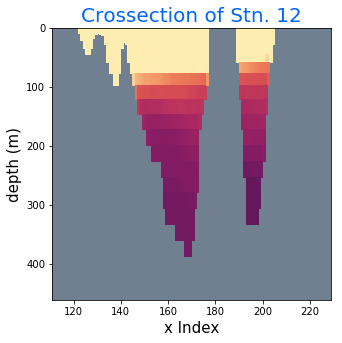

In [40]:
tcmap = cm.cm.matter
cblabel = 'DIC μmol/l'
surtit = 'DIC norm 32 '

dic = trac.variables['dissolved_inorganic_carbon']
plotdat = dic
print('type of plotdat')
print(type(plotdat))
section_slice = np.arange(110, 230)
v_min = 2050
v_max = 2150

t = 0
#depth slice
deep = 22

fig, ((ax1)) = plt.subplots(1,1, figsize = (5, 5))
land_colour = 'slategrey'
physdat = nc.Dataset('/data/tjarniko/results/may10_a1/tn_1h.nc')

zlevels = physdat.variables['deptht']

# AX 1 
zmax, ylocn = 41, 647
print('shape and type of plotdat - non subsetted plotting data')
print(plotdat.shape)
print(type(plotdat))

print('shape and type pdat - subsetted plotting data')

pdat = np.ma.masked_values(plotdat[t,:,ylocn,section_slice],0)
print(pdat.shape)
print(type(pdat))

print('contents of subsetted plotting data, at y = 20')
print(pdat[20,:])

print('shape of the meshgrid we created')
x, y, = np.meshgrid(section_slice,zlevels)
print(x.shape)

mesh = ax1.pcolormesh(
    x, y, pdat, cmap=tcmap, vmin=v_min, vmax=v_max)
ax1.invert_yaxis()

ax1.set_xlabel('x Index', fontsize = 15)
ax1.set_ylabel('depth (m)', fontsize = 15)
# Axes limits and grid
ax1.set_xlim(section_slice[1], section_slice[-1])
ax1.set_ylim(zlevels[zmax - 2] + 20, 0)
ax1.set_facecolor(land_colour)
#ax1.grid()
ax1.set_title('Crossection of Stn. 12', fontsize = 20, color = 'xkcd:bright blue')

plt.show()

## Plotdat is DIC as a numpy masked array

type of plotdat
<class 'numpy.ma.core.MaskedArray'>
shape and type of plotdat - non subsetted plotting data
(15, 40, 898, 398)
<class 'numpy.ma.core.MaskedArray'>
shape and type pdat - subsetted plotting data
(40, 120)
<class 'numpy.ma.core.MaskedArray'>
contents of subsetted plotting data, at y = 20
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- 1954.4295654296875
 1954.0384521484375 1952.8603515625 1952.041748046875 -- -- -- -- --
 1981.7515869140625 1983.9837646484375 1983.572998046875 1983.078125
 1982.6409912109375 1982.61962890625 1982.4593505859375 1982.191162109375
 -- 1981.2293701171875 1978.4952392578125 1977.607666015625
 1977.0589599609375 1976.3885498046875 1975.2796630859375 1974.6142578125
 1973.8594970703125 1973.0845947265625 1972.421630859375 1971.456787109375
 1970.96533203125 1970.4271240234375 1969.70947265625 1968.7431640625
 1968.5372314453125 1968.2821044921875 1968.219970703125 1968.2550048828125
 1968.1851806640625 1968.0994873046875 1968.066162109375 1967.9283447

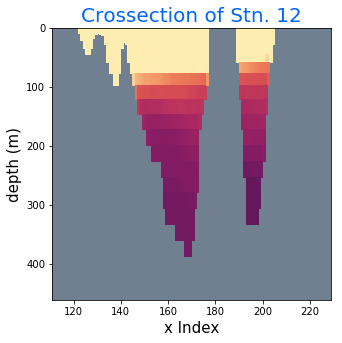

In [42]:
tcmap = cm.cm.matter
cblabel = 'DIC μmol/l'
surtit = 'DIC norm 32 '

dic = trac.variables['dissolved_inorganic_carbon'][:]
plotdat = dic
print('type of plotdat')
print(type(plotdat))
section_slice = np.arange(110, 230)
v_min = 2050
v_max = 2150

t = 0
#depth slice
deep = 22

fig, ((ax1)) = plt.subplots(1,1, figsize = (5, 5))
land_colour = 'slategrey'
physdat = nc.Dataset('/data/tjarniko/results/may10_a1/tn_1h.nc')

zlevels = physdat.variables['deptht']

# AX 1 
zmax, ylocn = 41, 647
print('shape and type of plotdat - non subsetted plotting data')
print(plotdat.shape)
print(type(plotdat))

print('shape and type pdat - subsetted plotting data')

pdat = np.ma.masked_values(plotdat[t,:,ylocn,section_slice],0)
pdat = pdat.T
print(pdat.shape)
print(type(pdat))

print('contents of subsetted plotting data, at y = 20')
print(pdat[20,:])

print('shape of the meshgrid we created')
x, y, = np.meshgrid(section_slice,zlevels)
print(x.shape)

mesh = ax1.pcolormesh(
    x, y, pdat, cmap=tcmap, vmin=v_min, vmax=v_max)
ax1.invert_yaxis()

ax1.set_xlabel('x Index', fontsize = 15)
ax1.set_ylabel('depth (m)', fontsize = 15)
# Axes limits and grid
ax1.set_xlim(section_slice[1], section_slice[-1])
ax1.set_ylim(zlevels[zmax - 2] + 20, 0)
ax1.set_facecolor(land_colour)
#ax1.grid()
ax1.set_title('Crossection of Stn. 12', fontsize = 20, color = 'xkcd:bright blue')

plt.show()